<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U35T2C68LogisticRegressionSeriesAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
REGRESION LOGISTICA3
  ACERCA DE ESTE SPRINT
    Objetivo del Sprint
      Comprender la regresión logística a través de su implementación desde cero (scratch).
      Aprender las bases sobre problemas de clasificación.
    Cómo aprenderemos
      Después de implementar la regresión logística desde cero, realizaremos el entrenamiento y la validación.

  REGRESION LOGISTICA DESDE CERO
    Crearemos una clase de regresión logística implementada desde cero, utilizando únicamente librerías mínimas como NumPy para desarrollar el algoritmo.
    A continuación, se proporciona una plantilla.
    En esta clase ScratchLogisticRegression deberás añadir el código.
    A diferencia de la regresión lineal, los métodos relacionados con la predicción serán dos:
      predict: para devolver etiquetas.
      predict_proba: para devolver probabilidades.

'''

accuracy_score: 0.9 
precision_score: 0.8333333333333334 
recall_score: 1.0 
f1_score: 0.9090909090909091 
confusion_matrix: [[ 8  2]
 [ 0 10]]


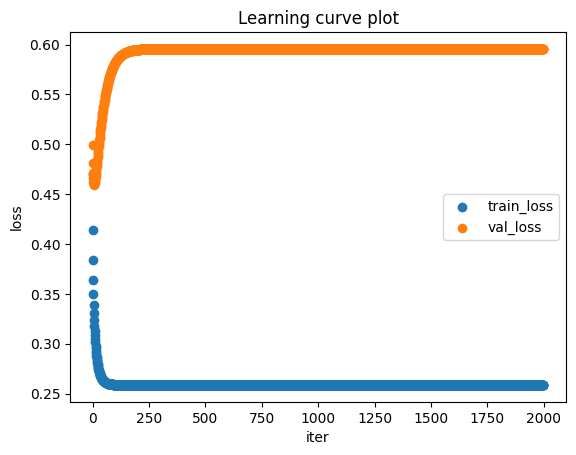

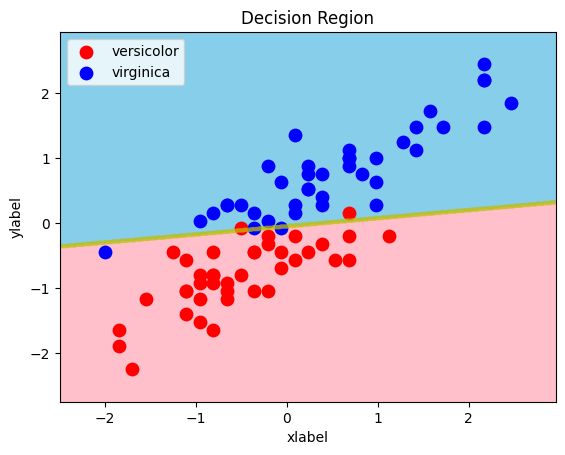

Theta values
[ 0.15657008 -0.42892549  3.44060365]


In [ ]:
#PLANTILLA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

class ScratchLogisticRegression():
    """
      Scratch Implementation of Logistic Regression
        Parameters
          num_iter : int
          Number of iterations
          lr : float
          Learning rate
          no_bias : bool
          Set to True if no bias term is included
          verbose : bool
          Set to True to output the learning process

        Attributes
          self.coef_ : ndarray of shape (n_features,)
          Parameters
          self.loss : ndarray of shape (self.iter,)
          Record of the loss on the training data
          self.val_loss : ndarray of shape (self.iter,)
          Record of the loss on the validation data
    """
    def __init__(self, num_iter=1000, lr=0.01, reg= 1, no_bias= False , verbose= False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.reg = reg
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    #PROBLEMA 1 - FUNCION HIPOTETICA
    def _hypotetical_function(self, X):
        y_hyp = 1 / (1 + np.exp(-np.dot(X, self.theta.T)))
        return y_hyp

    #PROBLEMA 2 - METODO DEL DESCENSO MAS PRONUNCIADO (GRADIENTE DESCENDIENTE)
    def _gradient_descent(self, X, y, y_hyp):
        n_samples, n_features = X.shape
        if not self.no_bias:
            update_theta = np.zeros([n_features])
            update_theta[0] = self.theta[0] - np.dot((y_hyp - y), X[:, 0]) / n_samples
            update_theta[1:] = self.theta[1:] - (np.dot((y_hyp - y), X[:, 1:]) + self.reg * self.theta[1:]) / n_samples
            return update_theta

        else:
            update_theta = self.theta - np.dot((y_hyp - y), X) + self.reg * self.theta
            return update_theta

    #PROBLEMA 3 - ESTIMACION (MECANISMO DE PREDICCION)
    def predict_proba(self, X, displayMode = True):
        """
        Estimate probabilities using Logistic Regression.
          Parameters
            X : ndarray of shape (n_samples, n_features)
            Samples

          Returns
            ndarray of shape (n_samples, 1)
            Estimated results from logistic regression
        """
        if not self.no_bias:
          n_samples = X.shape[0]
          X = np.hstack([np.ones([n_samples, 1]), X])

        y_pred = self._hypotetical_function(X)
        return np.hstack([(1 - y_pred).reshape(-1, 1), y_pred.reshape(-1, 1)]) if displayMode else y_pred

    def predict(self, X):
        """
        Estimate labels using Logistic Regression.
          Parameters
            X : ndarray of shape (n_samples, n_features)
            Samples

          Returns
            ndarray of shape (n_samples, 1)
            Estimated results from logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])

        y_pred = self._hypotetical_function(X)
        return np.round(y_pred).astype('int64')

    #PROBLEMA 4 - FUNCION DE PERDIDA (FUNCION OBJETIVO)
    def _loss_function(self, y_pred, y):
        n_samples = y.shape[0]

        #compute log*loss (cross entropy)
        log_loss = np.mean((-y * np.log(y_pred)) - (1 - y) * np.log(1 - y_pred))

        #Add L2 regularizacion (exclude bias term from regularization)
        if not self.no_bias:
            theta_reg = self.theta[1:]
        else:
            theta_reg = self.theta

        reg_term = self.reg * np.sum(theta_reg ** 2) / (2 * n_samples)
        return log_loss + reg_term

    #PROBLEMA 5 - APRENDIZAJE Y ESTIMACION
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train logistic regression.
          If validation data is provided, the loss and accuracy for it are also calculated at each iteration.
            Parameters
              X : ndarray of shape (n_samples, n_features)
              Features of the training data
              y : ndarray of shape (n_samples,)
              True labels of the training data
              X_val : ndarray of shape (n_samples, n_features)
              Features of the validation data
              y_val : ndarray of shape (n_samples,)
              True labels of the validation data
        """
        n_samples, n_features = X.shape

        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])

        # Prepare theta for hypotesis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))

        for i in range(self.iter):
            y_hyp = self._hypotetical_function(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)

            if X_val is not None and y_val is not None:
                y_predict = self.predict_proba(X_val, False)
                self.val_loss[i] = self._loss_function(y_predict, y_val)

        if self.verbose:
            # Output learning process when verbose is set to True
            print(f'loss: {self.loss}')
            print(f'val_loss: {self.val_loss}')

        #save theta
        np.save('theta', self.theta)

def scratch_train_test_split(X, y, train_size=0.8):
    '''
      Divide the validation data
        Parameters
        ----------
          X: ndarray          - training data (n_samples, n_features)
          y: ndarray          - correct answer value (n_samples,)
          train_size: float   - specify what percentage to use as a train (0 < train_size < 1)
        Returns
        ----------
          X_train: ndarray    - training data (n_samples, n_features)
          X_test: ndarray     - validation data (n_samples, n_eatures)
          y_train: ndarray    - correct answer value of training data (n_samples,)
          y_test: ndarray     - correct answer value of verification data (n_samples,)
    '''
    if train_size <= 0 or train_size >= 1:
        raise ValueError('train_size =(0) should be a float in the (0, 1)range'.format(train_size))

    train_size = int(train_size * X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = np.split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = np.split(y, [train_size])
    y_train = split[0]
    y_test = split[1]

    return X_train, X_test, y_train, y_test

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print(f'accuracy_score: {acc_score} ')
    print(f'precision_score: {prec_score} ')
    print(f'recall_score: {rec_score} ')
    print(f'f1_score: {f_score} ')
    print(f'confusion_matrix: {conf_matrix}')

def decision_region(X, y, model, step= 0.01, title= 'Decision Region',
                    xlabel= 'xlabel', yalbel= 'ylabel', target_names= ['versicolor', 'virginica']):
    import matplotlib.patches as mpatches
    from matplotlib.colors import ListedColormap
    # Setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # Pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])- 0.5, np.max(X[:,0])+ 0.5, step),
                                   np.arange(np.min(X[:,1])- 0.5, np.max(X[:,1])+ 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(yalbel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color= scatter_color[i], label= target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# PROBLEMA 5 - APRENDIZAJE Y ESTIMACION
# Load and prepare the data
X = pd.DataFrame(data = load_iris().data, columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
y = pd.DataFrame(load_iris().target, columns = [('Species')])

df = pd.concat([X, y], axis = 1)
df = df[["sepal length (cm)", "petal length (cm)", "Species"]][df['Species'] != 0]

X = df[["sepal length (cm)", "petal length (cm)"]].values
y = df['Species'].values

# Encode the Species value from (1, 2) to (0, 1)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scratch Logistic regression learning
slr = ScratchLogisticRegression(num_iter = 2000, lr = 0.01, no_bias= False, verbose = False)
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual value', 'Predicted value'])
evaluation(y_test, slr_predict)

# PROBLEMA 6 - GRAFICACION DE CURVA DE APRENDIZAJE
plt.title('Learning curve plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr.iter), slr.loss, label = 'train_loss')
plt.scatter(range(slr.iter), slr.val_loss, label = 'val_loss')
plt.legend()
plt.show()

# PROBLEMA 7 - VISUALIZACION DE REGISONES DE DECICION
decision_region(X_train_scaled, y_train, slr)

# PROBLMEA 8 - PRESERVACION DE PESOS
print('Theta values')
print(np.load('theta.npy'))